# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [46]:
# Import your libraries:
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_text
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [2]:
# Your code here:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [6]:
# Your code here:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [8]:
# Your code here:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [23]:
# Your code here:
print("shape of 'data':", diabetes['data'].shape)
print("shape of 'target':", diabetes['target'].shape)
print()
print("'data' is a 2D numpy array with 10 columns and 442 rows (as was suppose to be).\n'target is a 1D numpy array with 442 elements.'")

shape of 'data': (442, 10)
shape of 'target': (442,)

'data' is a 2D numpy array with 10 columns and 442 rows (as was suppose to be).
'target is a 1D numpy array with 442 elements.'


In [53]:
pd.DataFrame(diabetes['data']).describe().T

,count,mean,std,min,25%,50%,75%,max
0,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
1,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
2,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
3,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
4,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
5,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
6,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
7,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
8,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
9,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [24]:
# Your code here:
from sklearn import linear_model

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [25]:
# Your code here:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [27]:
# Your code here: features first, then target variable
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(diabetes['data'], diabetes['target'], test_size=20)

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [35]:
#pd.DataFrame(diabetes_target_train)

In [36]:
# Your code here:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

print("Intercept:", diabetes_model.intercept_)
print("Coefficients:", diabetes_model.coef_)

Intercept: 152.4703698173021
Coefficients: [ -21.80682659 -260.93302183  501.19619189  325.09609249 -762.9201162
  471.63655754   82.27889367  184.79226327  718.31652175   74.92194514]


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [37]:
diabetes_model

LinearRegression()

In [38]:
# Your code here:
diabetes_target_predict = diabetes_model.predict(diabetes_data_test)

#### Print your `diabetes_target_test` and compare with the prediction. 

In [57]:
# Your code here:
diabetes_target_predict

array([130.8081045 , 159.70245296, 186.86228106, 179.50649926,
       174.3245132 , 234.90576715, 122.10907129, 148.23371669,
       143.86912467, 123.04749105, 181.94978065,  63.43670324,
       122.30198289, 198.3599065 , 156.83117874,  75.8790736 ,
        70.45674418, 259.07267541, 101.09623345, 103.15015876])

In [59]:
diabetes_target_test

array([ 74., 129., 232., 283.,  91., 280.,  64., 168.,  50., 145., 263.,
        43.,  59., 222., 141., 104.,  39., 263.,  49.,  88.])

In [64]:
diabetes_target_predict / diabetes_target_test

array([1.76767709, 1.23800351, 0.80544087, 0.63429858, 1.91565399,
       0.83894917, 1.90795424, 0.88234355, 2.87738249, 0.84860339,
       0.69182426, 1.47527217, 2.07291496, 0.89351309, 1.11227786,
       0.72960648, 1.80658318, 0.98506721, 2.06318844, 1.17216089])

In [41]:
diabetes_model.score(diabetes_data_test, diabetes_target_test)

0.6185772719847745

In [60]:
errors =( np.abs(diabetes_target_test - diabetes_target_predict) / diabetes_target_test)*100

In [61]:
errors.mean()

50.49711120503605

(array([8., 4., 1., 0., 4., 2., 0., 0., 0., 1.]),
 array([  1.49327931,  20.11777631,  38.74227332,  57.36677032,
         75.99126732,  94.61576432, 113.24026133, 131.86475833,
        150.48925533, 169.11375233, 187.73824933]),
 <BarContainer object of 10 artists>)

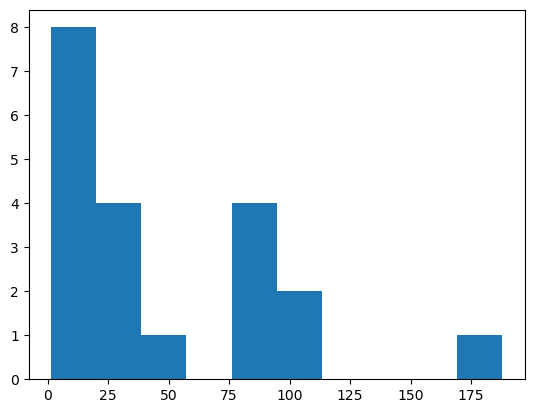

In [62]:
plt.hist(errors)

#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

In [65]:
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(diabetes['data'], diabetes['target'], test_size=130)

In [67]:
model = LinearRegression()

model.fit(diabetes_data_train, diabetes_target_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 150.84234715129622
Coefficients: [ -29.02556482 -211.39340014  404.97704814  426.43589663 -643.83396481
  419.8656415    -0.73849971  107.49121921  707.64658595   78.92454956]


In [70]:
predict = model.predict(diabetes_data_test)

In [73]:
model.score(diabetes_data_test, diabetes_target_test)

0.4696582291447009

In [74]:
errors =(np.abs(diabetes_target_test - predict) / diabetes_target_test)*100

In [75]:
errors.mean()

38.200763322412364

(array([62., 41.,  9.,  7.,  4.,  2.,  1.,  3.,  0.,  1.]),
 array([  0.54291976,  24.51160838,  48.48029701,  72.44898563,
         96.41767426, 120.38636288, 144.3550515 , 168.32374013,
        192.29242875, 216.26111738, 240.229806  ]),
 <BarContainer object of 10 artists>)

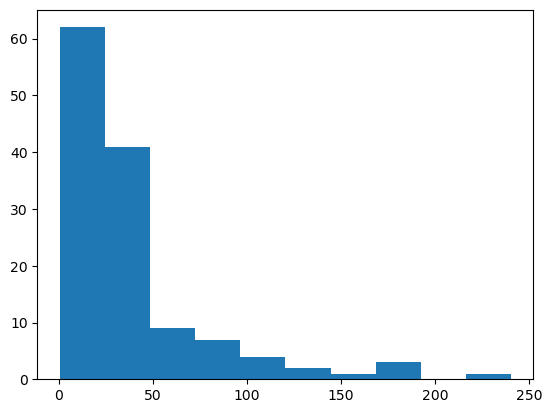

In [76]:
plt.hist(errors)

# Bonus Challenge 1 - Hypothesis Testing with `statsmodels`

After generating the linear regression model from the dataset, you probably wonder: then what? What is the statistical way to know if my model is reliable or not?

Good question. We'll discuss that using Scikit-Learn in Challenge 5. But for now, let's use a fool-proof way by using the ([Linear Regression class of StatsModels](https://www.statsmodels.org/dev/regression.html)) which can also conduct linear regression analysis plus much more such as calcuating the F-score of the linear model as well as the standard errors and t-scores for each coefficient. The F-score and t-scores will tell you whether you can trust your linear model.

To understand the statistical meaning of conducting hypothesis testing (e.g. F-test, t-test) for slopes, read [this webpage](https://onlinecourses.science.psu.edu/stat501/node/297/) at your leisure time. We'll give you a brief overview next.

* The F-test of your linear model is to verify whether at least one of your coefficients is significantly different from zero. Translating that into the *null hypothesis* and *alternative hypothesis*, that is:

    ```
    H0 : β1 = β2 = ... = β10 = 0
    HA : At least one βj ≠ 0 (for j = 1, 2, ..., 10)
    ```

* The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. In other words, this particular vaiable is not contributing to your linear model and you can remove it from your formula.

Read the documentations of [StatsModels Linear Regression](https://www.statsmodels.org/dev/regression.html) as well as its [`OLS` class](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) which stands for *ordinary least squares*.

#### In the next cell, analyze `diabetes_data_train` and `diabetes_target_train` with the linear regression model of `statsmodels`. Print the fit summary.

Your output should look like:

![statsmodels regression](../images/statsmodels.png)

In [ ]:
# Your code here:


#### Interpreting hypothesis testing results

Answer the following questions in the cell below:

1. What is the F-score of your linear model and is the null hypothesis rejected?

1. Does any of the t-tests of the coefficients produce a confidence interval containing zero? What are they?

1. How will you modify your linear reguression model according to the test results above?

In [ ]:
# Your answers here:

# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [78]:
# Your code here:
df = pd.read_csv('../data/auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [79]:
# Your code here:
df.head(5)

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [80]:
# Your code here:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object

What is the newest model year and the oldest model year?

In [166]:
# Your code here:
print("The newest model year is: ", df['model_year'].max())
print("The oldest model year is: ", df['model_year'].min())

The newest model year is:  82
The oldest model year is:  70


Check the dataset for missing values and remove all rows containing at least one missing value.

In [87]:
# Your code here:
# There were 6 missing values in column horse_power

df.isna().sum()
df.dropna(inplace=True)

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [91]:
# Your code here:
pd.DataFrame(df['cylinders'].value_counts()).T

cylinders,4,8,6,3,5
count,199,103,83,4,3


We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [95]:
# Your code here:
df = df.select_dtypes(include='number')

In [97]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horse_power', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [98]:
# Attributes:
X = df[['cylinders', 'displacement', 'horse_power', 'weight', 'acceleration', 'model_year']]

#Target data:
y = df['mpg']

In [99]:
# Split training and test data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7986)

In [102]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [106]:
X_train.shape[0], X_test.shape[0]

(313, 79)

Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [107]:
# Your code here:
auto_model = LinearRegression()

auto_model.fit(X_train, y_train)

LinearRegression()

In [109]:
# y_predict = auto_model.predict(X_test)

# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](). Its formula is:

![R Squared](../images/r-squared.png)

...where:

* yi is an actual data point.
* ŷi is the corresponding data point on the estimated regression line.

By adding the squares of the difference between all yi-ŷi pairs, we have a measure called SSE (*error sum of squares*) which is an application of the r squared score to indicate the extent to which the estimated regression model is different from the actual data. And we attribute that difference to the random error that is unavoidable in the real world. Obviously, we want the SSE value to be as small as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [115]:
# Your code here:
y_pred = auto_model.predict(X_train)

In [117]:
# from sklearn.metrics import r2_score

r2_score(y_train, y_pred)

0.7932072461774673

#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [118]:
# Your code here:

y_test_pred = auto_model.predict(X_test)

r2_score(y_test, y_test_pred)  

0.8756325911190641

#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. **The first is to create a simpler model. The second is to increase the train sample size.**

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [134]:
# Your code here:
X_train90, X_test90, y_train90, y_test90 = train_test_split(X, y, test_size = 0.1, random_state=5478)

Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [135]:
# Your code here:

scaler90 =  MinMaxScaler()

X_train90 = scaler90.fit_transform(X_train90)
X_test90 = scaler90.transform(X_test90)

X_train90 = pd.DataFrame(X_train90, columns=X.columns)
X_test90 = pd.DataFrame(X_test90, columns=X.columns)

y_train90 = y_train90.reset_index(drop=True)
y_test90 = y_test90.reset_index(drop=True)

In [136]:
# Your code here:
auto_model90 = LinearRegression()

auto_model90.fit(X_train90, y_train90)

LinearRegression()

In [137]:
auto_model90.coef_

array([ -1.51150578,   2.05891431,  -0.90121402, -23.09603407,
        -0.20905072,   8.91504315])

Compute the predicted values and r squared score for our new model and new sample data.

In [138]:
y_train90_pred = auto_model.predict(X_train90)

r2_score(y_train90, y_train90_pred)

0.807428994774965

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [139]:
# Your code here:
y_test90_pred = auto_model.predict(X_test90)

r2_score(y_test90, y_test90_pred)

0.8216200221988371

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [140]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [146]:
# Your code here:
selector = RFE(auto_model, n_features_to_select=3, step=1, verbose=0, importance_getter='auto')

Fit the model and print the ranking

In [147]:
# Your code here: X_train, X_test, y_train, y_test
selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [150]:
selector.ranking_

array([3, 2, 4, 1, 1, 1])

In [151]:
X_train.columns

Index(['cylinders', 'displacement', 'horse_power', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [154]:
# Your code here: 
X_reduced = df[['weight', 'acceleration', 'model_year']]

#Target data:
y_reduced = df['mpg'] 

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=7986)

scaler_red = MinMaxScaler()

X_train_reduced = scaler_red.fit_transform(X_train_reduced)
X_test_reduced = scaler_red.transform(X_test_reduced)

X_train_reduced = pd.DataFrame(X_train_reduced, columns=X_reduced.columns)
X_test_reduced = pd.DataFrame(X_test_reduced, columns=X_reduced.columns)

y_train_reduced = y_train_reduced.reset_index(drop=True)
y_test_reduced = y_test_reduced.reset_index(drop=True)

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [164]:
# Your code here: 
auto_model_reduced = LinearRegression()

auto_model_reduced.fit(X_train_reduced, y_train_reduced)

#Train data:
y_train_reduced_pred = auto_model_reduced.predict(X_train_reduced)

r2_train = r2_score(y_train_reduced, y_train_reduced_pred)

# Test data:
y_test_reduced_pred = auto_model_reduced.predict(X_test_reduced)

r2_test = r2_score(y_test_reduced, y_test_reduced_pred)

print("Initial r2 score for full data:")
print("r2 score for train data is: ",  round(0.7932072461774673, 5))
print("r2 score for test data is: ", round(0.8756325911190641, 5))
print()
print("r2 score after reductin number of atributes:")
print("r2 score for train data is:", round(r2_train, 5))
print("r2 score for test data is: ", round(r2_test, 5))

Initial r2 score for full data:
r2 score for train data is:  0.79321
r2 score for test data is:  0.87563

r2 score after reductin number of atributes:
r2 score for train data is: 0.79255
r2 score for test data is:  0.8754


In [158]:
X_test_reduced.shape

(79, 3)

#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.